___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [4]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2635,592,France,Female,27,4,0.000,2,1,1,183569.250,0
2148,630,Spain,Male,26,7,0.000,2,1,1,6656.640,0
6216,479,France,Male,47,1,0.000,1,1,0,95270.830,0
9381,765,Spain,Male,45,2,91549.780,1,1,1,47139.440,0
6754,627,Spain,Female,28,3,157597.610,1,0,1,34097.220,0
5010,575,Germany,Male,49,7,121205.150,4,1,1,168080.530,1
533,543,Spain,Male,35,10,59408.630,1,1,0,76773.530,0
9105,658,France,Male,31,5,100082.140,1,0,1,49809.880,0
3141,710,Germany,Female,24,2,110407.440,2,0,0,15832.430,1
8106,590,Spain,Female,51,10,84474.620,2,1,1,190937.090,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

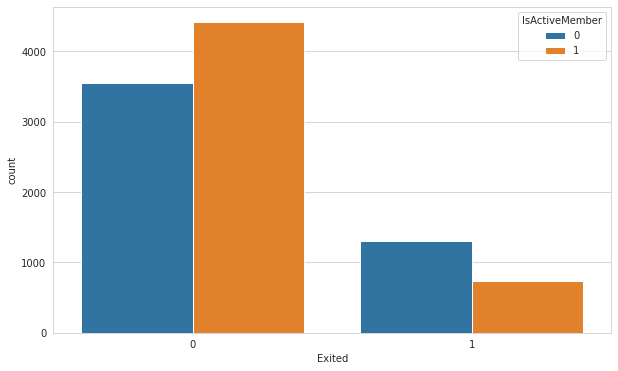

In [10]:
sns.countplot(df['Exited'],hue=df['IsActiveMember'])

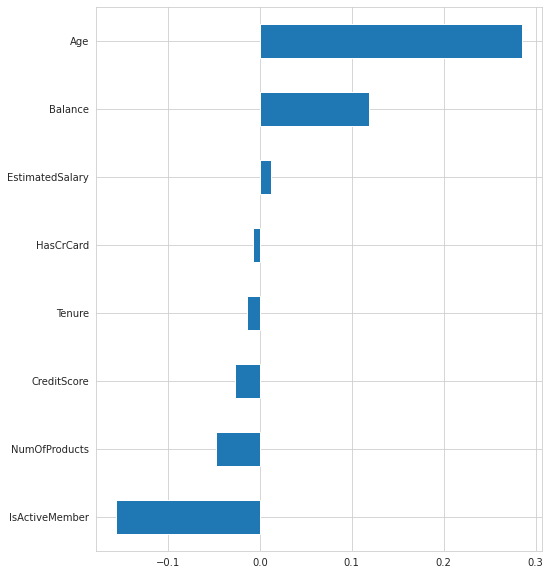

In [11]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

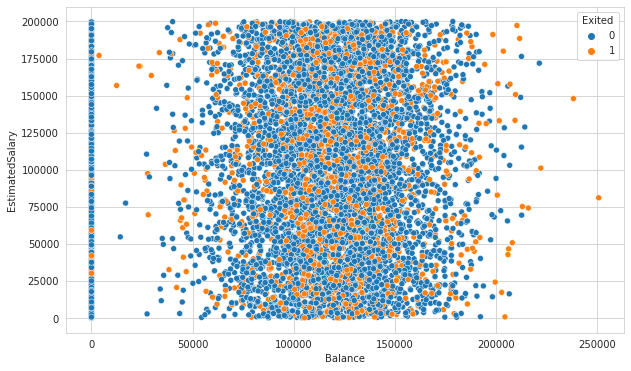

In [12]:
sns.scatterplot(x=df['Balance'],y=df['EstimatedSalary'],hue=df['Exited'])

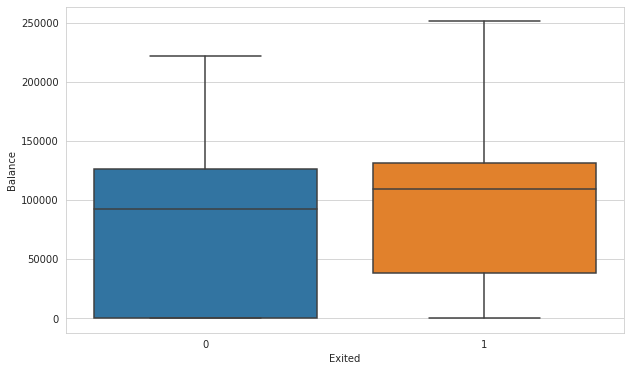

In [13]:
sns.boxplot(y=df['Balance'],x=df['Exited'])

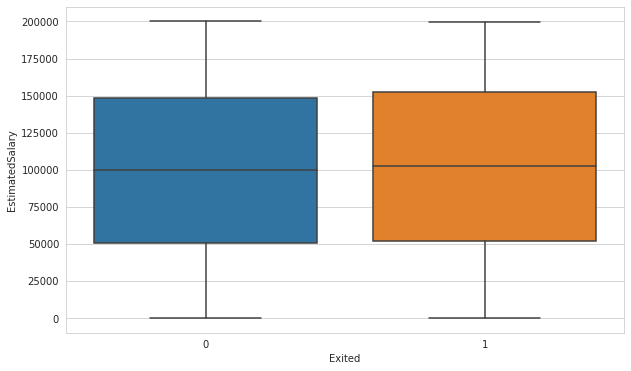

In [14]:
sns.boxplot(y=df['EstimatedSalary'],x=df['Exited'])

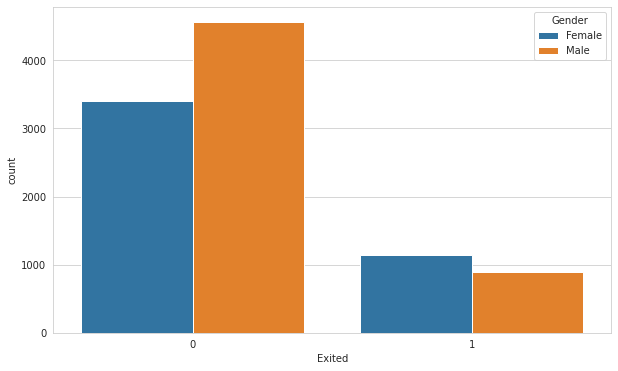

In [15]:
sns.countplot(x=df['Exited'],hue=df['Gender'])

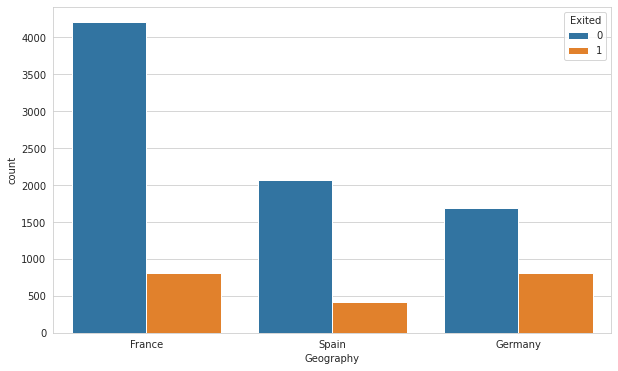

In [16]:
sns.countplot(df['Geography'],hue=df['Exited'])

In [17]:
df_dummies=pd.get_dummies(df['Geography'])

In [18]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [19]:
df=pd.concat([df,df_dummies],axis=1)

In [20]:
df=df.drop(columns=['Geography'])

In [21]:
df.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
2021,716,0,18,3,128743.800,1,0,0,197322.130,0,0,1,0
4336,580,1,38,9,115442.190,2,1,0,128481.500,1,0,1,0
1614,641,1,77,9,0.000,3,1,1,81514.060,0,1,0,0
8273,675,1,32,1,0.000,3,1,0,85901.090,0,1,0,0
1372,489,1,38,8,0.000,2,0,1,196990.790,0,1,0,0
9092,781,1,38,2,117810.790,1,0,1,65632.330,1,1,0,0
1145,546,1,28,8,0.000,1,1,0,159254.290,0,1,0,0
8862,813,1,59,2,135078.410,1,1,0,187636.060,1,0,1,0
2551,537,0,53,3,0.000,1,1,1,91406.620,0,1,0,0
4182,550,1,52,5,121016.230,1,1,1,41730.370,1,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y)

In [81]:
from sklearn.preprocessing import MinMaxScaler  


In [82]:
scaler = MinMaxScaler()

In [83]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [31]:
X_train.shape

(9000, 12)

In [ ]:
model = Sequential()

model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model.add(Dense(9, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.5566 - accuracy: 0.7300 - val_loss: 0.5125 - val_accuracy: 0.7656
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.7994 - val_loss: 0.4931 - val_accuracy: 0.7678
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.8049 - val_loss: 0.4772 - val_accuracy: 0.7833
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.8149 - val_loss: 0.4568 - val_accuracy: 0.8089
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8220 - val_loss: 0.4466 - val_accuracy: 0.8056
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8251 - val_loss: 0.4368 - val_accuracy: 0.8033
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8396 - val_loss: 0.4272 - val_accuracy: 0.8111

In [ ]:
model_2 = Sequential()

model_2.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_2.add(Dense(12, activation = 'relu'))
model_2.add(Dense(6, activation = 'relu'))
model_2.add(Dense(3, activation = 'relu'))
model_2.add(Dense(1, activation = "sigmoid"))

model_2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_2.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.5390 - accuracy: 0.7899 - val_loss: 0.5132 - val_accuracy: 0.7656
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4667 - accuracy: 0.7998 - val_loss: 0.4948 - val_accuracy: 0.7656
Epoch 3/500
254/254 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7999 - val_loss: 0.4785 - val_accuracy: 0.7689
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8090 - val_loss: 0.4627 - val_accuracy: 0.7867
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8217 - val_loss: 0.4619 - val_accuracy: 0.7978
Epoch 6/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8322 - val_loss: 0.4270 - val_accuracy: 0.8078
Epoch 7/500
254/254 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8386 - val_loss: 0.4180 - val_accuracy: 0.8122

In [ ]:
pd.DataFrame(model.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.308,0.873,0.421,0.833
std,0.022,0.011,0.021,0.007
min,0.291,0.730,0.389,0.766
25%,0.296,0.870,0.402,0.830
50%,0.301,0.876,0.417,0.833
75%,0.314,0.879,0.438,0.837
max,0.557,0.883,0.513,0.847


In [ ]:
pd.DataFrame(model_2.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.313,0.871,0.395,0.839
std,0.020,0.009,0.012,0.009
min,0.299,0.790,0.376,0.766
25%,0.304,0.870,0.389,0.837
50%,0.308,0.873,0.394,0.840
75%,0.315,0.875,0.399,0.843
max,0.539,0.880,0.513,0.854


In [ ]:
## Even though the second model has more hidden layers and neurons, the first model still gives better performance.

In [ ]:
model_3= Sequential()

model_3.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_3.add(Dense(9, activation = 'relu'))
model_3.add(Dense(6, activation = 'relu'))
model_3.add(Dense(1, activation = "sigmoid"))

model_3.compile(optimizer = "Nadam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_3.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1)

Epoch 1/500
254/254 [==============================] - 4s 6ms/step - loss: 0.5155 - accuracy: 0.7757 - val_loss: 0.5032 - val_accuracy: 0.7656
Epoch 2/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4546 - accuracy: 0.8011 - val_loss: 0.4848 - val_accuracy: 0.7667
Epoch 3/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4366 - accuracy: 0.8078 - val_loss: 0.4682 - val_accuracy: 0.7933
Epoch 4/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4224 - accuracy: 0.8149 - val_loss: 0.4545 - val_accuracy: 0.8033
Epoch 5/500
254/254 [==============================] - 1s 5ms/step - loss: 0.4094 - accuracy: 0.8227 - val_loss: 0.4467 - val_accuracy: 0.8100
Epoch 6/500
254/254 [==============================] - 1s 5ms/step - loss: 0.3981 - accuracy: 0.8248 - val_loss: 0.4422 - val_accuracy: 0.8056
Epoch 7/500
254/254 [==============================] - 2s 7ms/step - loss: 0.3885 - accuracy: 0.8289 - val_loss: 0.4455 - val_accuracy: 0.8056

In [ ]:
pd.DataFrame(model_3.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.314,0.872,0.402,0.830
std,0.018,0.009,0.011,0.006
min,0.299,0.776,0.384,0.766
25%,0.304,0.870,0.395,0.829
50%,0.310,0.874,0.400,0.831
75%,0.316,0.876,0.405,0.833
max,0.516,0.880,0.503,0.842


In [ ]:
#In the third model, we changed the optimizer but didn't have a better performance so that we will continue with the first model.

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

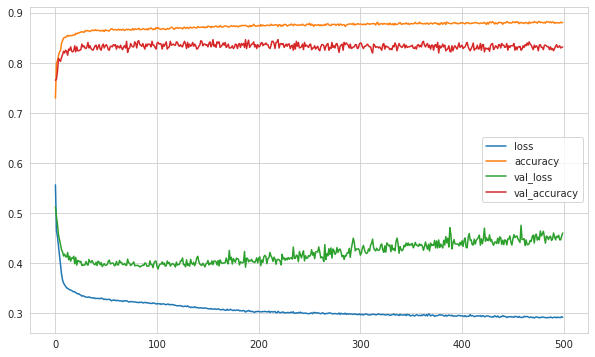

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.34946757555007935, 0.8569999933242798]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [49]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [ ]:
model_4 = Sequential()

model_4.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_4.add(Dense(9, activation = 'relu'))
model_4.add(Dense(6, activation = 'relu'))
model_4.add(Dense(1, activation = "sigmoid"))

model_4.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_4.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1,class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6700 - accuracy: 0.6837 - val_loss: 0.6591 - val_accuracy: 0.6367
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6426 - accuracy: 0.6481 - val_loss: 0.6303 - val_accuracy: 0.6567
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6240 - accuracy: 0.6626 - val_loss: 0.6052 - val_accuracy: 0.6811
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6032 - accuracy: 0.6788 - val_loss: 0.6328 - val_accuracy: 0.6411
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.6905 - val_loss: 0.5859 - val_accuracy: 0.6778
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5709 - accuracy: 0.7020 - val_loss: 0.6181 - val_accuracy: 0.6500
Epoch 7/500
254/254 [==============================] - 1s 3ms/step - loss: 0.5609 - accuracy: 0.7093 - val_loss: 0.5259 - val_accuracy: 0.7378

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
pd.DataFrame(model_4.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.427,0.800,0.480,0.761
std,0.028,0.018,0.033,0.025
min,0.408,0.648,0.400,0.637
25%,0.414,0.801,0.457,0.747
50%,0.419,0.805,0.476,0.761
75%,0.430,0.807,0.498,0.779
max,0.670,0.811,0.659,0.828


In [ ]:
y_pred = model_4.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[678 118]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       796
           1       0.55      0.71      0.62       204

    accuracy                           0.82      1000
   macro avg       0.74      0.78      0.75      1000
weighted avg       0.84      0.82      0.83      1000



In [ ]:
#After we regulated the class weight ,recall numbers has improved

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model_5 = Sequential()

model_5.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_5.add(Dense(9, activation = 'relu'))
model_5.add(Dense(6, activation = 'relu'))
model_5.add(Dense(1, activation = "sigmoid"))

model_5.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

opt = Adam(lr = 0.003)
model_5.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_5.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1,class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6380 - accuracy: 0.6863 - val_loss: 0.6168 - val_accuracy: 0.6767
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.7073 - val_loss: 0.5925 - val_accuracy: 0.6989
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5505 - accuracy: 0.7375 - val_loss: 0.5807 - val_accuracy: 0.7100
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7486 - val_loss: 0.4886 - val_accuracy: 0.7544
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5110 - accuracy: 0.7590 - val_loss: 0.5871 - val_accuracy: 0.7033
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4945 - accuracy: 0.7689 - val_loss: 0.5347 - val_accuracy: 0.7244
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7715 - val_loss: 0.5108 - val_accuracy: 0.7411

In [ ]:
pd.DataFrame(model_5.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.411,0.809,0.504,0.762
std,0.023,0.011,0.034,0.022
min,0.388,0.686,0.417,0.653
25%,0.397,0.808,0.482,0.748
50%,0.405,0.811,0.503,0.761
75%,0.419,0.814,0.526,0.777
max,0.638,0.820,0.651,0.823


In [ ]:
y_pred = model_5.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[670 126]
 [ 71 133]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       796
           1       0.51      0.65      0.57       204

    accuracy                           0.80      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.82      0.80      0.81      1000



In [ ]:
model_6 = Sequential()

model_6.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_6.add(Dense(9, activation = 'relu'))
model_6.add(Dense(6, activation = 'relu'))
model_6.add(Dense(1, activation = "sigmoid"))

model_6.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

opt = Adam(lr = 0.005)
model_6.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_6.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1,class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6173 - accuracy: 0.6767 - val_loss: 0.5185 - val_accuracy: 0.7389
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.6970 - val_loss: 0.5012 - val_accuracy: 0.7656
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5629 - accuracy: 0.7111 - val_loss: 0.5096 - val_accuracy: 0.7344
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.7427 - val_loss: 0.4923 - val_accuracy: 0.7556
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.7730 - val_loss: 0.5140 - val_accuracy: 0.7411
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.7727 - val_loss: 0.5167 - val_accuracy: 0.7344
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.4749 - accuracy: 0.7785 - val_loss: 0.5180 - val_accuracy: 0.7422

In [ ]:
pd.DataFrame(model_6.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.410,0.805,0.513,0.753
std,0.024,0.010,0.036,0.019
min,0.384,0.677,0.412,0.688
25%,0.394,0.804,0.491,0.742
50%,0.401,0.806,0.514,0.752
75%,0.420,0.809,0.538,0.763
max,0.617,0.814,0.616,0.824


In [ ]:
y_pred = model_6.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[643 153]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.49      0.71      0.58       204

    accuracy                           0.79      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.79      0.80      1000



In [ ]:
#increasing the learning rate didn't improve the model but  stopped overfit situation.

### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model_7 = Sequential()

model_7.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model.add(Dropout(0.5))
model_7.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.5))
model_7.add(Dense(6, activation = 'relu'))
model_7.add(Dropout(0.5))
model_7.add(Dense(1, activation = "sigmoid"))

model_7.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model_7.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1,class_weight=class_weights)

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6798 - accuracy: 0.5817 - val_loss: 0.6313 - val_accuracy: 0.6900
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6567 - accuracy: 0.5777 - val_loss: 0.6102 - val_accuracy: 0.6900
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6403 - accuracy: 0.5721 - val_loss: 0.6291 - val_accuracy: 0.6689
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6306 - accuracy: 0.5825 - val_loss: 0.6354 - val_accuracy: 0.6600
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6223 - accuracy: 0.5986 - val_loss: 0.5830 - val_accuracy: 0.7244
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6170 - accuracy: 0.6058 - val_loss: 0.5624 - val_accuracy: 0.7333
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.5907 - val_loss: 0.6019 - val_accuracy: 0.6933

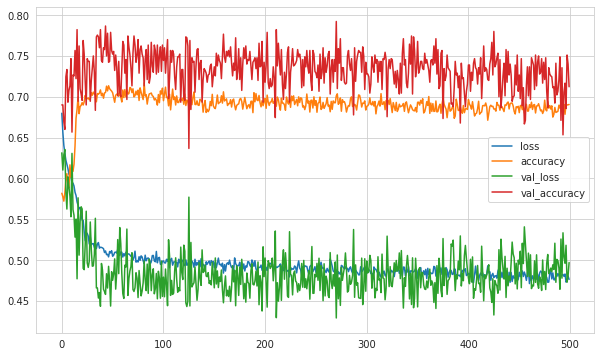

In [ ]:
pd.DataFrame(model_7.history.history).plot()

In [ ]:
pd.DataFrame(model_7.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,500.000,500.000,500.000,500.000
mean,0.496,0.690,0.485,0.734
std,0.025,0.017,0.029,0.024
min,0.470,0.572,0.429,0.637
25%,0.484,0.686,0.466,0.720
50%,0.490,0.691,0.480,0.737
75%,0.498,0.697,0.496,0.749
max,0.680,0.717,0.635,0.792


In [ ]:
y_pred = model_7.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[585 211]
 [ 33 171]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.83       796
           1       0.45      0.84      0.58       204

    accuracy                           0.76      1000
   macro avg       0.70      0.79      0.71      1000
weighted avg       0.84      0.76      0.78      1000



### Add Early Stop

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_8 = Sequential()

model_8.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_8.add(Dense(9, activation = 'relu'))
model_8.add(Dense(6, activation = 'relu'))
model_8.add(Dense(1, activation = "sigmoid"))

model_8.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

opt = Adam(lr = 0.001)
model_8.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model_8.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6482 - accuracy: 0.6879 - val_loss: 0.6138 - val_accuracy: 0.6833
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5951 - accuracy: 0.6989 - val_loss: 0.5690 - val_accuracy: 0.7100
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.7153 - val_loss: 0.5522 - val_accuracy: 0.7222
Epoch 4/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7358 - val_loss: 0.6129 - val_accuracy: 0.6844
Epoch 5/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.7484 - val_loss: 0.5541 - val_accuracy: 0.7211
Epoch 6/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7621 - val_loss: 0.5943 - val_accuracy: 0.6911
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5013 - accuracy: 0.7644 - val_loss: 0.5650 - val_accuracy: 0.7144

In [ ]:
pd.DataFrame(model_8.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,243.000,243.000,243.000,243.000
mean,0.434,0.799,0.481,0.766
std,0.029,0.016,0.032,0.023
min,0.412,0.688,0.413,0.683
25%,0.417,0.798,0.460,0.755
50%,0.426,0.804,0.477,0.768
75%,0.438,0.808,0.495,0.782
max,0.648,0.813,0.614,0.826


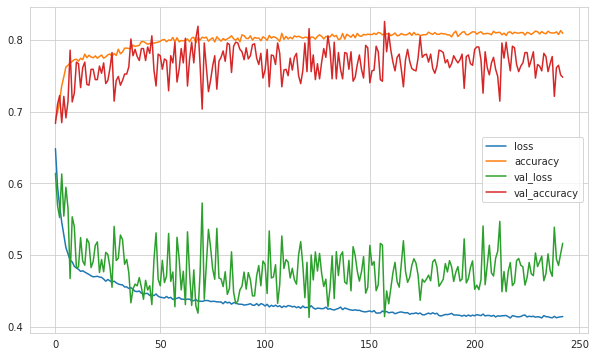

In [ ]:
pd.DataFrame(model_8.history.history).plot()

In [ ]:
y_pred = model_8.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[647 149]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.49      0.70      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.72      1000
weighted avg       0.83      0.79      0.80      1000



#### Monitor the "val_recall" as metric

In [ ]:
model_9 = Sequential()

model_9.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_9.add(Dense(9, activation = 'relu'))
model_9.add(Dense(6, activation = 'relu'))
model_9.add(Dense(1, activation = "sigmoid"))

model_9.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

opt = Adam(lr = 0.001)
model_9.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model_9.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 500, verbose=1,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/500
254/254 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.7601 - val_loss: 0.6229 - val_accuracy: 0.6878
Epoch 2/500
254/254 [==============================] - 1s 2ms/step - loss: 0.6257 - accuracy: 0.6826 - val_loss: 0.6563 - val_accuracy: 0.5878
Epoch 3/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5955 - accuracy: 0.6737 - val_loss: 0.5682 - val_accuracy: 0.6900
Epoch 4/500
254/254 [==============================] - 1s 4ms/step - loss: 0.5700 - accuracy: 0.6989 - val_loss: 0.5827 - val_accuracy: 0.6967
Epoch 5/500
254/254 [==============================] - 2s 9ms/step - loss: 0.5443 - accuracy: 0.7233 - val_loss: 0.5488 - val_accuracy: 0.7189
Epoch 6/500
254/254 [==============================] - 1s 5ms/step - loss: 0.5273 - accuracy: 0.7401 - val_loss: 0.5719 - val_accuracy: 0.6989
Epoch 7/500
254/254 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.7454 - val_loss: 0.5494 - val_accuracy: 0.7167

In [ ]:
pd.DataFrame(model_9.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,78.000,78.000,78.000,78.000
mean,0.474,0.769,0.515,0.731
std,0.038,0.019,0.041,0.032
min,0.447,0.674,0.436,0.588
25%,0.454,0.767,0.488,0.713
50%,0.463,0.774,0.513,0.728
75%,0.475,0.777,0.538,0.755
max,0.668,0.787,0.656,0.789


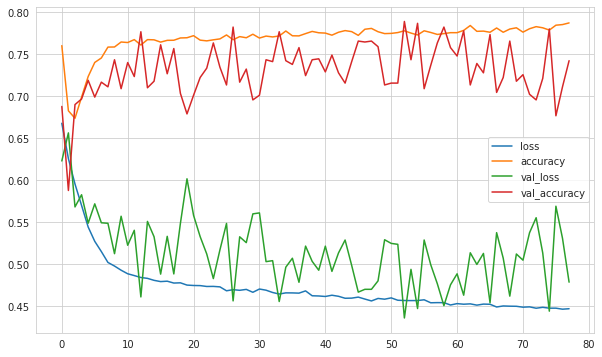

In [ ]:
pd.DataFrame(model_9.history.history).plot()

In [ ]:
y_pred = model_9.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[691 105]
 [ 75 129]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       796
           1       0.55      0.63      0.59       204

    accuracy                           0.82      1000
   macro avg       0.73      0.75      0.74      1000
weighted avg       0.83      0.82      0.82      1000



## GridSearchCV

In [32]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [40]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [42]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(42)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [43]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
127/127 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.7933 - val_loss: 0.4551 - val_accuracy: 0.7867
Epoch 2/200
127/127 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8132 - val_loss: 0.4016 - val_accuracy: 0.8333
Epoch 3/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8365 - val_loss: 0.3573 - val_accuracy: 0.8544
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8483 - val_loss: 0.3458 - val_accuracy: 0.8556
Epoch 5/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8538 - val_loss: 0.3360 - val_accuracy: 0.8622
Epoch 6/200
127/127 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8557 - val_loss: 0.3362 - val_accuracy: 0.8533
Epoch 7/200
127/127 [==============================] - 0s 1ms/step - loss: 0.34

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f898bdf2350>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [44]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [53]:
model_10 = Sequential()

model_10.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1])) 
model_10.add(Dense(9, activation = 'relu'))
model_10.add(Dense(6, activation = 'relu'))
model_10.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model_10.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [54]:
model_10.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 500, verbose=1,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/500
127/127 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.6132 - val_loss: 0.6107 - val_accuracy: 0.6722
Epoch 2/500
127/127 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6863 - val_loss: 0.6034 - val_accuracy: 0.6756
Epoch 3/500
127/127 [==============================] - 0s 1ms/step - loss: 0.5649 - accuracy: 0.7204 - val_loss: 0.5590 - val_accuracy: 0.7078
Epoch 4/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7351 - val_loss: 0.5061 - val_accuracy: 0.7489
Epoch 5/500
127/127 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7467 - val_loss: 0.5456 - val_accuracy: 0.7189
Epoch 6/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.7611 - val_loss: 0.4414 - val_accuracy: 0.8133
Epoch 7/500
127/127 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7657 - val_loss: 0.5015 - val_accuracy: 0.7444

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [55]:
pd.DataFrame(model_10.history.history).describe()

,loss,accuracy,val_loss,val_accuracy
count,44.000,44.000,44.000,44.000
mean,0.475,0.782,0.481,0.770
std,0.041,0.036,0.051,0.040
min,0.448,0.613,0.378,0.672
25%,0.454,0.784,0.448,0.748
50%,0.460,0.794,0.469,0.778
75%,0.475,0.800,0.506,0.795
max,0.649,0.807,0.611,0.842


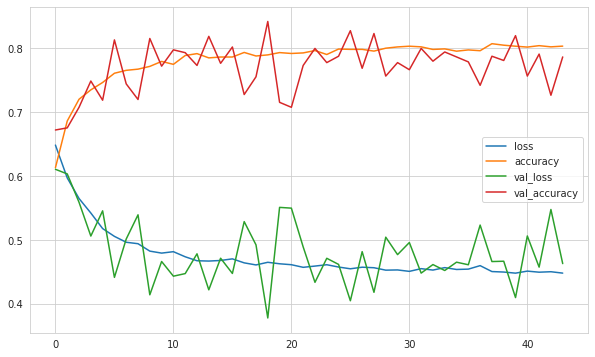

In [56]:
pd.DataFrame(model_10.history.history).plot()

In [58]:

y_pred = model_10.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[736  60]
 [ 91 113]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       796
           1       0.65      0.55      0.60       204

    accuracy                           0.85      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.84      0.85      0.84      1000



In [60]:
loss, acc = model_10.evaluate(X_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - loss: 0.3632 - accuracy: 0.8490 - 34ms/epoch - 1ms/step
Untrained model, accuracy: 84.90%


# Final Model and Model Deployment

In [75]:
import pickle
pickle.dump(scaler, open("scaler_exit", 'wb'))

In [62]:
from keras.models import load_model
model_10.save("final_model.h5")
loaded_model = load_model("final_model.h5")
loss, accuracy = loaded_model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 942us/step - loss: 0.3632 - accuracy: 0.8490


## Prediction

In [115]:
customer_pred=df.drop('Exited',axis=1).iloc[0:1,:]

In [116]:
type(customer_pred)

pandas.core.frame.DataFrame

In [117]:
customer_pred

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.000,1,1,1,101348.880,1,0,0


In [118]:
customer_pred=scaler.transform(customer_pred)

In [119]:
customer_pred

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, 2.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0134888e+05, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

In [120]:
(loaded_model.predict(customer_pred) > 0.5).astype("int32")

array([[1]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___